## Python Assignment (Fazhir)

In [1]:
# ignore this if you already installed Biopython
!pip install biopython 

In [2]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

#### 1. Documenting Dr. X's function

In [3]:
# select out only the sequences from the fasta_fn file by;
# calling the fasta file to memory as an argument
def get_sequences_from_file(fasta_fn):
    # opens an empty dictionary
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        # break the description of the sequence such that each word appears on a single line
        description = record.description.split()
        # arrange the species_name in the dictionary
        # call the words on the first and second rows, with a space in between then denoted as `" "`
        species_name = description[1] + " " + description[2]
        # allocates the created species_name to the respective sequence in the dictionary
        sequence_data_dict[species_name] = record.seq
    # closes the for-loop and stores the resultant dictionary created to memory
    return(sequence_data_dict)

#### 2. String-translate function

In [4]:
from Bio.Data import CodonTable
from Bio.Seq import Seq

In [5]:
def translate_function(string_nucleotides):
    # call the Vertebrate Mitochondrial table of chodons
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    # open an empty string for storing the nucleotide sequences
    aa_seq_string = ''
    for i in range(1, len(string_nucleotides), 3):
        # consider a codon to be every other three nucleotides in length
        codon = string_nucleotides[i:i+3]
        # if we meet any of these sequences, we consider the read done and stop at them
        if codon in ["TAA", "TAG", "AGA", "AGG"]:
            return aa_seq_string
        # the final aa sequence is obtained by assigning codon laters from the mito_table to the identified codons
        aa_seq_string = aa_seq_string+mito_table.forward_table[codon]
    return(aa_seq_string)

#### 3. Alternative translate function

In [6]:
# BioPython library offers seq.translate() funtion
# hence we can translate directly via the Library
def translate_viaLib(string_nucleotides):
    # we annotate the called sequences with the Vertebrate Mitochondial table to stop whenever a stop codon is realized
    seq_string = Seq.translate(string_nucleotides, table=2, to_stop=True)
    return seq_string # seq_string is the output sequence

#### 4. Count AA analysis function

In [7]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

# call in the created aa sequence to be computed
def compute_molecular_weight(aa_seq):
    # ProteinAnalysis function will make a temporary sequence as a string 
    temp_aa = ProteinAnalysis(aa_seq)
    molecular_wt = temp_aa.molecular_weight() # calculate the mol.wt for the temporary protein
    return molecular_wt

#### 5. Analyzing the GC content

In [8]:
def gc_content(dna_string):
    g_count = dna_string.count("G") # counts how many times G appears in the DNA seq
    c_count = dna_string.count("C") # counts how many times C appears in the DNA seq
    string_length = len(dna_string) # computes the length of the provided sequence
    # sum the g and c and returns the value as a ratio of the entire sequence length
    gc = (c_count+g_count)/string_length 
    return  gc

In [9]:
#%%%%%%%%%%%%%%%%#
###   MAIN   ###
#%%%%%%%%%%%%%%%%#

In [10]:
import numpy as np
file1 = 'penguins_cytb.fasta'
cytb_seqs = get_sequences_from_file(file1) 

In [11]:
penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass

In [12]:
species_list = list(penguins_df.species)

#### 6. Adding two columns for Molecular weight and body mass

In [13]:
for index, row in penguins_df.iterrows():
            # create two new columns with 'NaN' to indicate they are empty
            penguins_df.loc[index,'Molecular_wt'] = 'NaN'
            penguins_df.loc[index,'GC content'] = 'NaN'

#### 7. Translate each sequence, get its molecular weight and GC content

In [14]:
# open empty lists to accomodate the molecular weights and GC contents
molecular_wt_list = []
gc_content_list = []
# for the loop through; each key represents a species; 
# value is the dna sequence for each of the species;
for key, value in cytb_seqs.items():
    aa_seq = translate_viaLib(value) #translate the dna seq
    molecular_wt = compute_molecular_weight(str(aa_seq)) # compute the seq's molecular weight
    gc_prop = gc_content(value) # compute the GC content
    # assign the computed values to the previously opened empty lists
    molecular_wt_list.append(molecular_wt)
    gc_content_list.append(gc_prop)

# replace the 'NaN' with the results of computation
penguins_df["Molecular_wt"] = molecular_wt_list
penguins_df["GC content"] = gc_content_list

In [15]:
penguins_df # checking to make sure the codes are doing what I tell them to 

,species,mass,Molecular_wt,GC content
0,Aptenodytes forsteri,28.00,42459.6021,0.483815
1,Aptenodytes patagonicus,13.40,42563.7067,0.496938
2,Eudyptes chrysocome,2.80,42475.5753,0.511811
3,Eudyptes chrysolophus,4.50,42445.5493,0.509186
4,Eudyptes sclateri,4.25,42475.5753,0.508311
5,Eudyptula minor,1.60,42491.6408,0.492563
6,Pygoscelis adeliae,4.60,42458.6140,0.490814
7,Pygoscelis antarctica,4.10,42404.5423,0.477690
8,Pygoscelis papua,6.10,42595.8759,0.471566
9,Spheniscus demersus,3.20,42431.5490,0.482940


#### 8. Visualizing species by mass

<AxesSubplot:title={'center':'Mass by species'}, xlabel='species'>

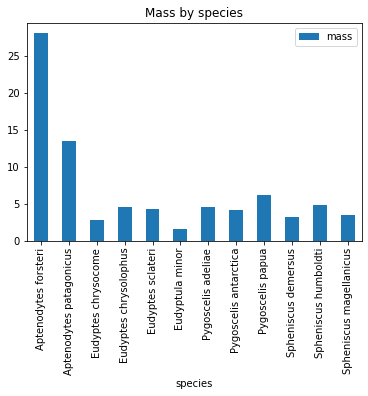

In [16]:
# use the matplotlib function; functional for jupyter notebooks
%matplotlib inline
# plot with the x-axis having the species and the y-axis is their respective masses
penguins_df.plot(kind='bar',x='species',y='mass', title='Mass by species')

*Q1* What is the smallest penguin species?
##### Eudyptula minor

*Q2* What is the geographical range of this species?
##### This species is native to the coasts of New Zealand but is also found in the southern coast of Australia and towards the South Solitary Island off the coast of New South Wales.  [(Hoskins et al., 2008)](https://doi.org/10.3354/meps07507) 

#### 9. Molecular weight Vs GC content

<AxesSubplot:title={'center':'Relationship between molecular weight and GC content'}, xlabel='GC content', ylabel='Molecular_wt'>

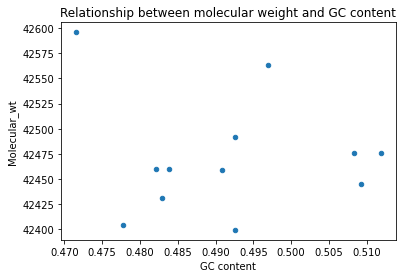

In [17]:
# define data for the axes
x_data = molecular_wt_list
y_data = gc_content_list
# this can be ploted on a scatter plot
penguins_df.plot(kind='scatter',x="GC content",y="Molecular_wt", title='Relationship between molecular weight and GC content')

#### 10. Saving the new DataFrame

In [18]:
penguins_df.to_csv('penguins_mass_cytb.csv', index=False)

#### 11. BONUS
I looked at the positioning of the Molecular weights of the different species on a plane. This was intended to give me a quick insight of the any species' molecular weight relative to any other species in the sample.

In [19]:
# may not run this if you already have it installed
!pip install seaborn 

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# set plot dimensions
plot_dims = (12, 9)

([Text(0.5, 0, 'Species'), Text(0, 0.5, 'Molecular weight (g)')],)

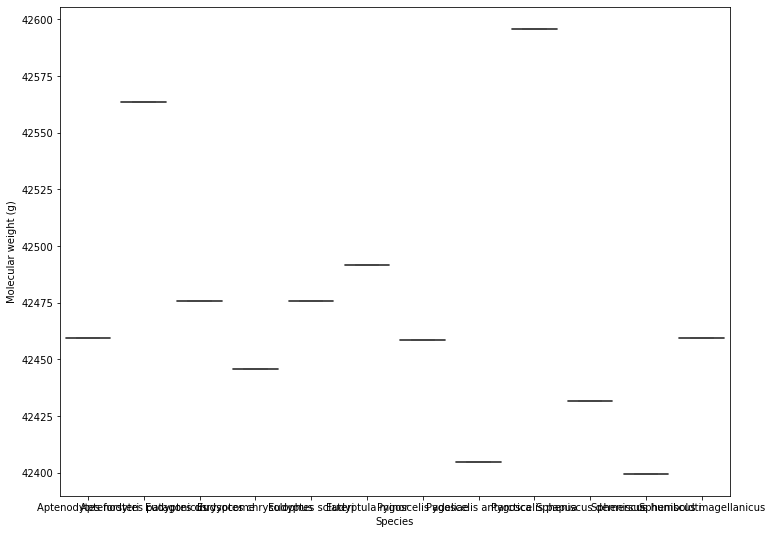

In [22]:
fig, ax = plt.subplots(figsize=plot_dims)
sns.boxplot(x='species', y='Molecular_wt', data=penguins_df) # used the penguins_df from the previous analyses
ax.set(xlabel='Species', ylabel='Molecular weight (g)'),

# END